<a href="https://colab.research.google.com/github/shivampip/NotDog/blob/master/Dog_vs_Cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ImgData Class

In [0]:
from google.colab import files
files.upload()

Saving imgdata.py to imgdata.py


{'imgdata.py': b'# This class provides full image data importing and preprocessing pipeline.\n# It makes data ready to feed any NN.\n\nimport os\nimport matplotlib.pyplot as plt \nimport matplotlib.image as mpimg\nfrom tensorflow.keras.preprocessing.image import load_img, img_to_array\nimport math\nimport numpy as np \n\nclass ImgData:\n    \n    # folder_path= folder containing images\n    # out_dim= 128 x 128 pixel (like this)\n    def __init__(self, folder_path):\n        self.folder_path= folder_path\n        self.out= []\n\n   \n\n    def get_all_files(self):\n        self.files= os.listdir(self.folder_path) \n        self.count= len(self.files)\n        self.files_path= [os.path.join(self.folder_path, fname) for fname in self.files]\n        print("Total {} image files found".format(self.count))\n\n\n\n    def plot_raw_sample(self, rows=4, cols= 4):\n        pix= self.files_path[0:rows*cols]\n        \n        fig= plt.figure(figsize= (cols*2, rows*2))\n        \n        for inde

### Download dataset

In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2019-06-11 07:40:50--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.203.128, 2607:f8b0:400c:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   172MB/s    in 0.4s    

2019-06-11 07:40:50 (172 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
mkdir data

In [0]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('data')
zip_ref.close()

In [0]:
pwd

'/content'

In [0]:
from imgdata import ImgData

In [145]:
dog_data= ImgData(folder_path='/content/data/cats_and_dogs_filtered/train/dogs')
dog_data.get_all_files()

Total 1000 image files found


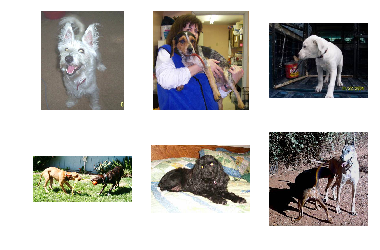

In [146]:
dog_data.plot_raw_sample(rows=2, cols=3)

In [147]:
idogs= dog_data.process(size= (150,150))

Resizing................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model

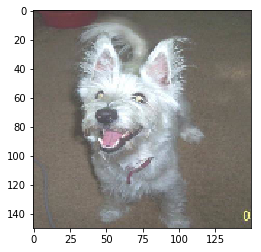

In [149]:
plt.imshow(np.array(idogs[0], dtype=np.int32))

In [150]:
cat_data= ImgData(folder_path='/content/data/cats_and_dogs_filtered/train/cats')
cat_data.get_all_files()

Total 1000 image files found


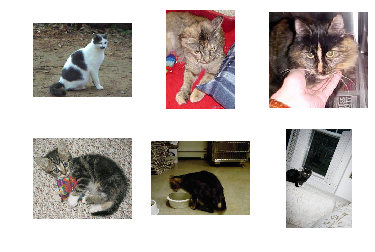

In [151]:
cat_data.plot_raw_sample(rows= 2, cols= 3)

In [152]:
icats= cat_data.process(size= (150, 150))

Resizing................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

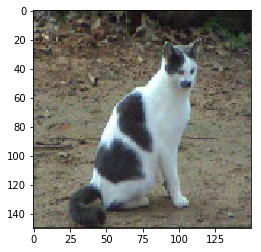

In [153]:
plt.imshow(np.array(icats[0], dtype= np.int32))

### Combining datasets

In [0]:
y_dog= np.zeros((idogs.shape[0], 1))
y_cat= np.ones((icats.shape[0], 1))

In [0]:
X, y= dog_data.shuffle(data=[(idogs, y_dog), (icats, y_cat)])

In [0]:
X= X/255.0

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, shuffle= True)

In [158]:
print(X_train.shape)
print(y_test.shape)

(1500, 150, 150, 3)
(500, 1)


## Model Building

In [0]:
img_input= layers.Input(shape= (150, 150, 3))

x= layers.Conv2D(16, 3, activation= 'relu')(img_input)
x= layers.MaxPool2D(2)(x)

x= layers.Conv2D(32, 3, activation= 'relu')(x)
x= layers.MaxPool2D(2)(x)

x= layers.Conv2D(64, 3, activation= 'relu')(x)
x= layers.MaxPool2D(2)(x)

x= layers.Flatten()(x)

x= layers.Dense(512, activation= 'relu')(x)
x= layers.Dropout(0.2)(x)

output= layers.Dense(1, activation='sigmoid')(x)

In [137]:
model= Model(img_input, output)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 17, 17, 64)        0         
__________

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [139]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Train on 1500 samples, validate on 500 samples
Epoch 1/5
1500/1500 [==============================] - 47s 31ms/sample - loss: 1.0777 - acc: 0.5353 - val_loss: 0.6680 - val_acc: 0.6260
Epoch 2/5
1500/1500 [==============================] - 46s 31ms/sample - loss: 0.6711 - acc: 0.5967 - val_loss: 0.6310 - val_acc: 0.6480
Epoch 3/5
1500/1500 [==============================] - 46s 31ms/sample - loss: 0.6007 - acc: 0.6747 - val_loss: 0.6111 - val_acc: 0.6500
Epoch 4/5
1500/1500 [==============================] - 47s 31ms/sample - loss: 0.5454 - acc: 0.7393 - val_loss: 0.6183 - val_acc: 0.6740
Epoch 5/5
1500/1500 [==============================] - 46s 31ms/sample - loss: 0.4789 - acc: 0.7807 - val_loss: 0.6522 - val_acc: 0.6760


In [140]:
test_loss, test_acc= model.evaluate(X_test, y_test)
print("Accuracy: {:.2f}".format(test_acc))
print("Loss: {:.2f}".format(test_loss))

500/500 [==============================] - 5s 10ms/sample - loss: 0.6522 - acc: 0.6760
Accuracy: 0.6759999990463257
Loss: 0.6522450304031372


In [0]:
model.save('first.h5')

In [161]:
new_model = tf.keras.models.load_model('first.h5')
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 17, 17, 64)        0         
__________

In [162]:
new_model.evaluate(X_test, y_test)

500/500 [==============================] - 5s 10ms/sample - loss: 0.4281 - acc: 0.8120


[0.42809792757034304, 0.812]

In [163]:
new_model.fit(X, y, epochs= 5)

Epoch 1/5
2000/2000 [==============================] - 56s 28ms/sample - loss: 0.5076 - acc: 0.7855
Epoch 2/5
2000/2000 [==============================] - 55s 28ms/sample - loss: 0.3847 - acc: 0.8250
Epoch 3/5
2000/2000 [==============================] - 55s 28ms/sample - loss: 0.3201 - acc: 0.8600
Epoch 4/5
2000/2000 [==============================] - 55s 28ms/sample - loss: 0.2390 - acc: 0.8930
Epoch 5/5
2000/2000 [==============================] - 55s 28ms/sample - loss: 0.1689 - acc: 0.9320


In [0]:
new_model.save("second.h5")

### Evaluation

In [180]:
test_dog_data= ImgData(folder_path='data/cats_and_dogs_filtered/validation/dogs')
test_dog_data.get_all_files()

Total 500 image files found


In [181]:
test_dogs= test_dog_data.process(size= (150, 150))

Resizing.................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................... DONE
Converting to NP......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [182]:
test_cat_data= ImgData(folder_path='data/cats_and_dogs_filtered/validation/cats')
test_cat_data.get_all_files()

Total 500 image files found


In [183]:
test_cats= test_cat_data.process(size= (150, 150))

Resizing.................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................... DONE
Converting to NP......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [0]:
y_test_dogs= np.zeros((test_dogs.shape[0], 1))
y_test_cats= np.ones((test_cats.shape[0], 1))

In [0]:
test_X, test_y = test_dog_data.shuffle(data= [(test_dogs, y_test_dogs), (test_cats, y_test_cats)])

In [0]:
test_X/= 255.0

In [190]:
new_model.evaluate(test_X, test_y)

1000/1000 [==============================] - 10s 10ms/sample - loss: 0.8230 - acc: 0.7060


[0.8230055432319641, 0.706]

### DONE